Accuracy for k=2: 1.00
Accuracy for k=3: 1.00
Accuracy for k=4: 1.00
Accuracy for k=5: 1.00
Accuracy for k=6: 1.00
Accuracy for k=7: 1.00
Accuracy for k=8: 1.00
Accuracy for k=9: 1.00
Accuracy for k=10: 1.00
Accuracy for k=11: 1.00
Accuracy for k=12: 1.00
Accuracy for k=13: 1.00
Accuracy for k=14: 1.00
Accuracy for k=15: 1.00
Accuracy for k=16: 1.00
Accuracy for k=17: 1.00
Accuracy for k=18: 1.00
Accuracy for k=19: 1.00
Accuracy for k=20: 1.00
Accuracy for k=21: 1.00
Accuracy for k=22: 1.00
Accuracy for k=23: 1.00
Accuracy for k=24: 1.00
Accuracy for k=25: 1.00
Accuracy for k=26: 1.00
Accuracy for k=27: 1.00
Accuracy for k=28: 1.00
Accuracy for k=29: 1.00
Accuracy for k=30: 1.00
Accuracy for k=31: 1.00
Accuracy for k=32: 1.00
Accuracy for k=33: 1.00
Accuracy for k=34: 1.00
Accuracy for k=35: 1.00
Accuracy for k=36: 1.00
Accuracy for k=37: 1.00
Accuracy for k=38: 1.00
Accuracy for k=39: 1.00
Accuracy for k=40: 1.00
Accuracy for k=41: 1.00
Accuracy for k=42: 1.00
Accuracy for k=43: 1.00


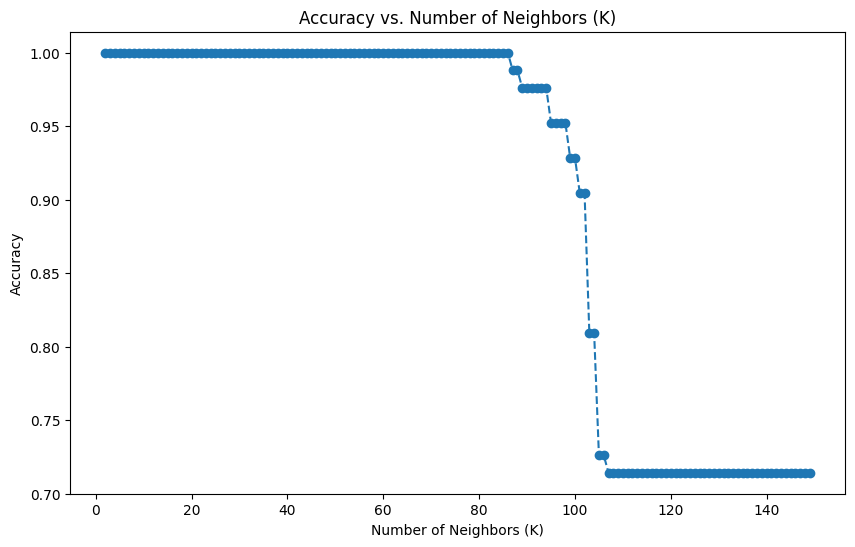

In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('/content/breast_cancer_survival.csv')

target_mapping = {'Alive': 1, 'Dead': 0}
her2_mapping = {'Positive': 1, 'Negative': 0}
tumour_stage_mapping = {'I': 1, 'II': 2, 'III': 3}

data['Patient_Status'] = data['Patient_Status'].map(target_mapping)
data['HER2 status'] = data['HER2 status'].map(her2_mapping)
data['Tumour_Stage'] = data['Tumour_Stage'].map(tumour_stage_mapping)

target = data['Patient_Status']

columns_to_drop = ['Gender', 'Histology', 'ER status', 'PR status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit']
features = data.drop(columns=columns_to_drop)

features = features.fillna(0)
target = target.fillna(0)

scaler = MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=50)


k_values = range(2, 150)


accuracy_scores = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[k] = accuracy


for k, accuracy in accuracy_scores.items():
    print(f'Accuracy for k={k}: {accuracy:.2f}')



k_values_list = list(accuracy_scores.keys())
accuracy_values = list(accuracy_scores.values())


plt.figure(figsize=(10, 6))
plt.plot(k_values_list, accuracy_values, marker='o', linestyle='--')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.show()


MSE for k=1: 0.21
MSE for k=2: 0.17
MSE for k=3: 0.09
MSE for k=4: 0.11
MSE for k=5: 0.10
MSE for k=6: 0.08
MSE for k=7: 0.09
MSE for k=8: 0.09
MSE for k=9: 0.08
MSE for k=10: 0.09
MSE for k=11: 0.09
MSE for k=12: 0.10
MSE for k=13: 0.09
MSE for k=14: 0.11
MSE for k=15: 0.09
MSE for k=16: 0.09
MSE for k=17: 0.10
MSE for k=18: 0.10
MSE for k=19: 0.10
MSE for k=20: 0.11
MSE for k=21: 0.11
MSE for k=22: 0.10
MSE for k=23: 0.09
MSE for k=24: 0.09
MSE for k=25: 0.09
MSE for k=26: 0.09
MSE for k=27: 0.09
MSE for k=28: 0.10
MSE for k=29: 0.10
MSE for k=30: 0.10
MSE for k=31: 0.10
MSE for k=32: 0.11
MSE for k=33: 0.11
MSE for k=34: 0.12


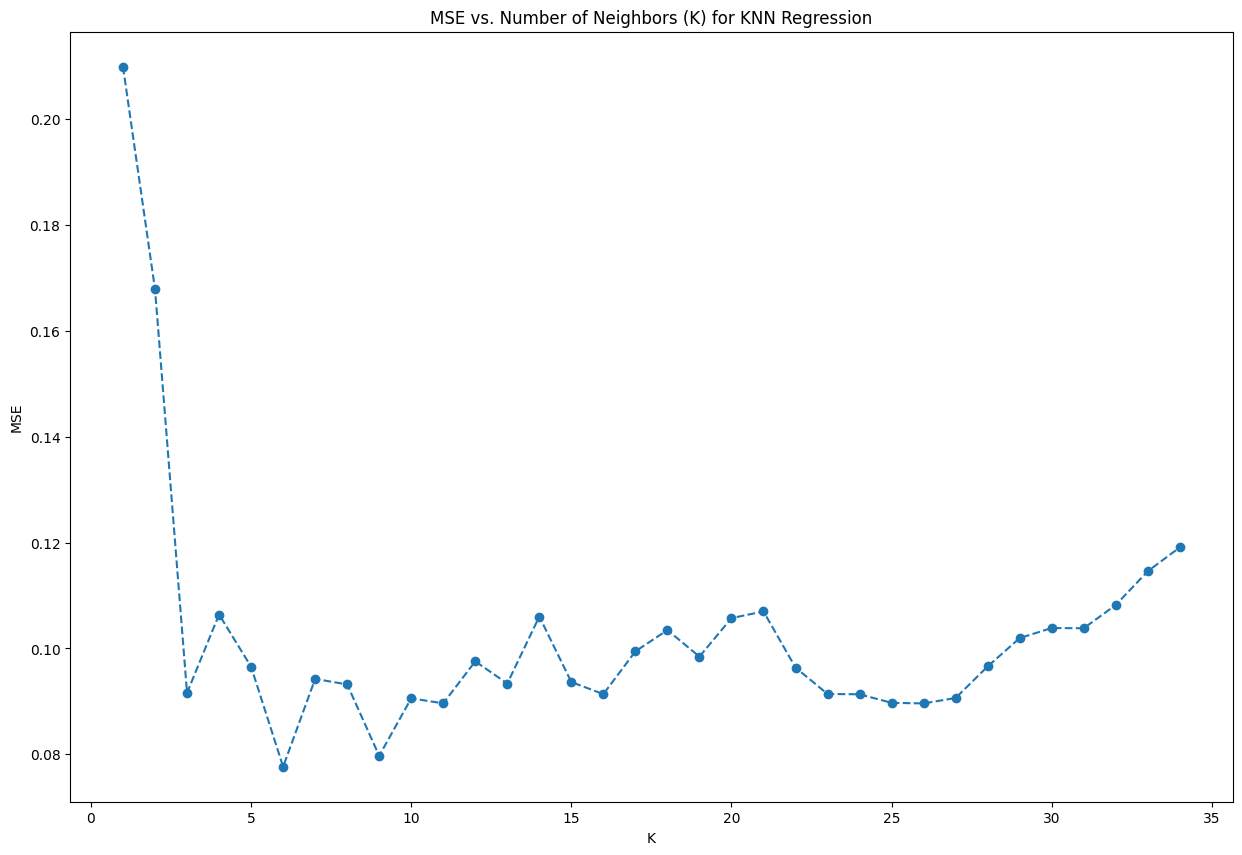

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


data = pd.read_csv('/content/Japan_life_expectancy copy.csv')

features = data.drop('Life_expectancy',axis=1)
features = data.drop('Prefecture',axis=1)
target = data['Life_expectancy']
features = features.fillna(features.mean())


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=50)


k_values = range(1, 35)
mse_values = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    print(f'MSE for k={k}: {mse:.2f}')


plt.figure(figsize=(15, 10))
plt.plot(k_values, mse_values, marker='o', linestyle='--')
plt.title('MSE vs. Number of Neighbors (K) for KNN Regression')
plt.xlabel('K')
plt.ylabel('MSE')
plt.show()